In [86]:
using LinearAlgebra
using ControlSystems

In [87]:
h = 0.1

0.1

In [88]:
M = [1.0 0; 0 1.0]

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [89]:
K = [-1.0 0; 0 -1.0]

2×2 Matrix{Float64}:
 -1.0   0.0
  0.0  -1.0

In [90]:
A = [1.0 0; 0 1.0]

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

In [91]:
B = h*[1.0 0; 0 1.0]

2×2 Matrix{Float64}:
 0.1  0.0
 0.0  0.1

In [92]:
R = M
Q = K

2×2 Matrix{Float64}:
 -1.0   0.0
  0.0  -1.0

In [93]:
N = 100

100

In [94]:
P = zeros(2,2,N)
P[:,:,N] .= Q

2×2 view(::Array{Float64, 3}, :, :, 100) with eltype Float64:
 -1.0   0.0
  0.0  -1.0

In [95]:
K = zeros(2,2,N-1);

In [96]:
for k = (N-1):-1:1
    K[:,:,k] .= (R .+ B'*P[:,:,k+1]*B)\(B'*P[:,:,k+1]*A)
    P[:,:,k] .= Q + K[:,:,k]'*R*K[:,:,k] + (A-B*K[:,:,k])'*P[:,:,k+1]*(A-B*K[:,:,k])
end

In [97]:
#Forward rollout starting at x0
qhist = zeros(2,N)
qhist[:,1] = [1; -1]
vhist = zeros(2,N-1)
for k = 1:(N-1)
    vhist[:,k] .= -K[:,:,k]*qhist[:,k]
    qhist[:,k+1] .= A*qhist[:,k] + B*vhist[:,k]
end

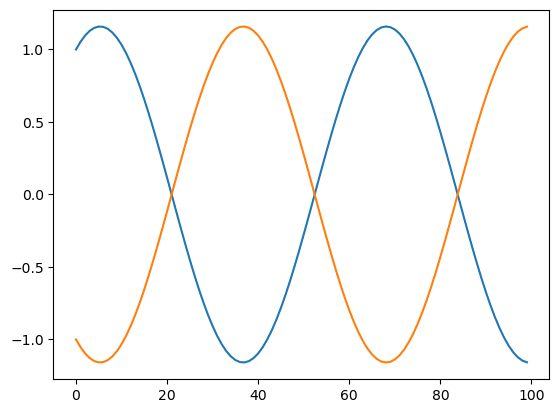

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e091dde0>

In [98]:
plot(qhist[1,:])
plot(qhist[2,:])

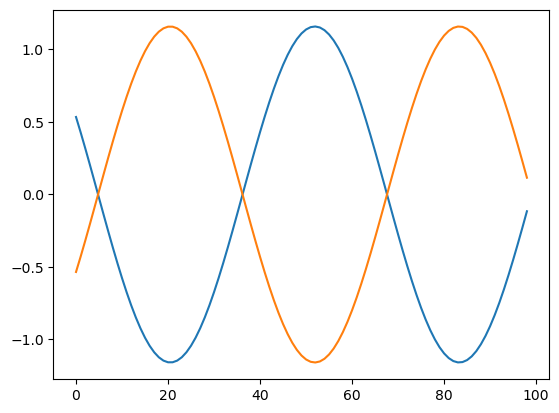

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e09af3d0>

In [99]:
plot(vhist[1,:])
plot(vhist[2,:])

In [83]:
using PyPlot

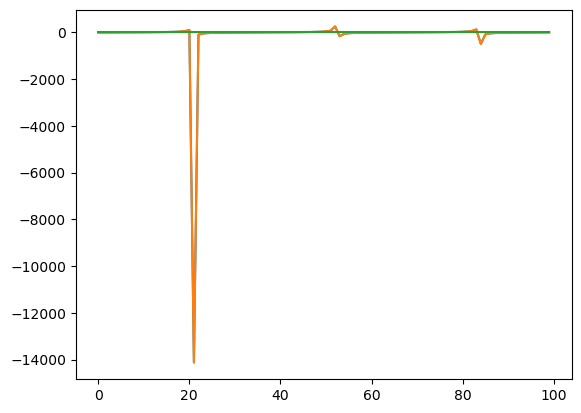

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e085c9a0>

In [84]:
plot(P[1,1,:])
plot(P[2,2,:])
plot(P[1,2,:])

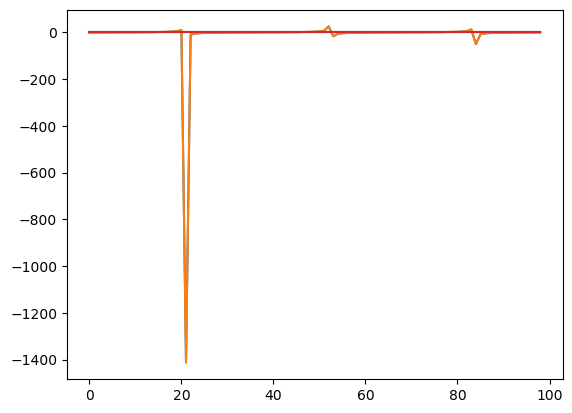

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1e08e82b0>

In [85]:
plot(K[1,1,:])
plot(K[2,2,:])
plot(K[1,2,:])
plot(K[2,1,:])